2372.5
2512.5
140.0
lower_bound 2162.5
upper_bound 2722.5
Case 1: Monthly Expenses
Outliers: [3000, 10000]


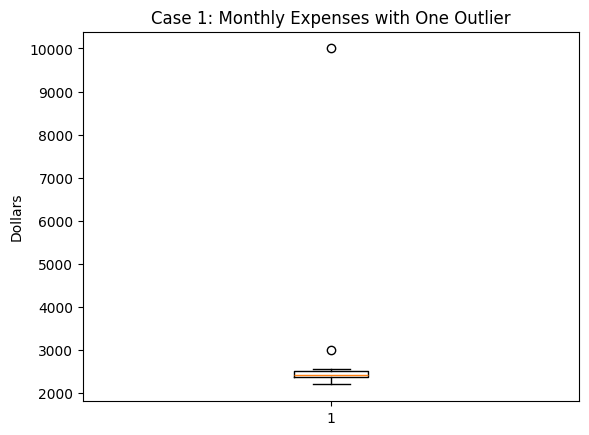

2.9625000000000004
3.1
0.13749999999999973
lower_bound 2.7562500000000005
upper_bound 3.3062499999999995

Case 2: Coffee Prices
Outliers: []


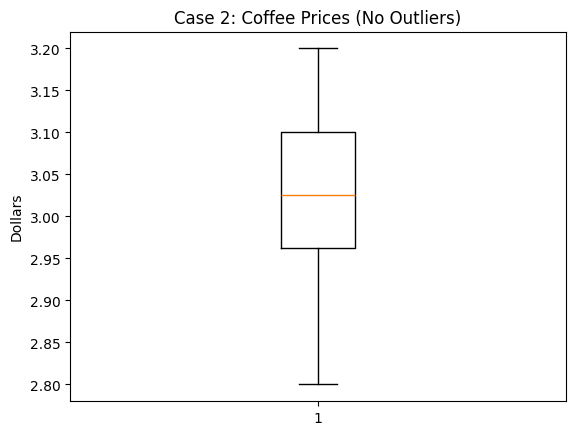

51.25
74.25
23.0
lower_bound 16.75
upper_bound 108.75

Case 3: Exam Scores
Outliers: [5, 8]


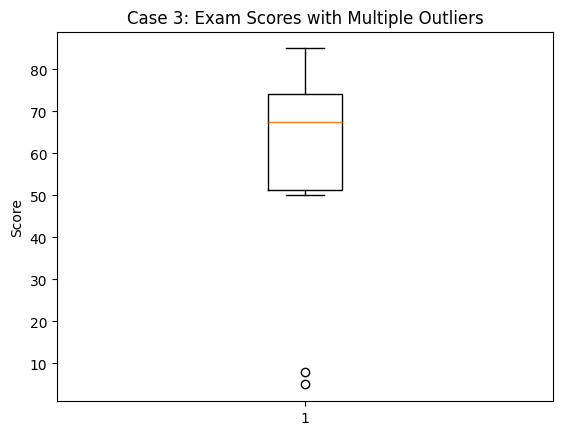

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    print(Q1)
    Q3 = np.percentile(data, 75)
    print(Q3)
    IQR = Q3 - Q1
    print(IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("lower_bound",lower_bound)
    print("upper_bound",upper_bound)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

# -----------------------------
# Case 1: One Outlier
# Monthly expenses in dollars (one month had a huge hospital bill)
expenses = [2200, 2500, 2300, 2400, 2450, 2550, 2350, 2400, 2380, 2420, 3000, 10000]

outliers1, lb1, ub1 = detect_outliers_iqr(expenses)
print("Case 1: Monthly Expenses")
print("Outliers:", outliers1)

plt.boxplot(expenses)
plt.title("Case 1: Monthly Expenses with One Outlier")
plt.ylabel("Dollars")
plt.show()

# -----------------------------
# Case 2: No Outliers
# Daily coffee prices at a café ($)
coffee_prices = [2.8, 3.0, 3.1, 2.9, 3.2, 3.0, 3.1, 3.05, 2.95, 3.15]

outliers2, lb2, ub2 = detect_outliers_iqr(coffee_prices)
print("\nCase 2: Coffee Prices")
print("Outliers:", outliers2)

plt.boxplot(coffee_prices)
plt.title("Case 2: Coffee Prices (No Outliers)")
plt.ylabel("Dollars")
plt.show()

# -----------------------------
# Case 3: Multiple Outliers (both sides)
# Exam scores of students out of 100
scores = [5, 8, 50, 55,  65, 70, 72, 75,  82, 85]
outliers3, lb3, ub3 = detect_outliers_iqr(scores)
print("\nCase 3: Exam Scores")
print("Outliers:", outliers3)

plt.boxplot(scores)
plt.title("Case 3: Exam Scores with Multiple Outliers")
plt.ylabel("Score")
plt.show()

# How to Deal With Them


1. Remove Outliers

In [ ]:
import pandas as pd

# Example using IQR
Q1 = df['col'].quantile(0.25)
Q3 = df['col'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['col'] >= lower) & (df['col'] <= upper)]


2. Transform Data

In [ ]:
import numpy as np

df['log_col'] = np.log1p(df['col'])

3. Impute Outliers

Replace them with mean, median, or other statistics:

In [ ]:
median = df['col'].median()
df.loc[df['col'] > upper, 'col'] = median
df.loc[df['col'] < lower, 'col'] = median

4. Keep Them

They may be important

**Data Transformation**

**Encoding categorical variables**

1.   Label Encoding → Converts categories to numbers (e.g., Male=0, Female=1).
2.   One-Hot Encoding → Creates binary columns (e.g., Red=[1,0,0], Blue=[0,1,0], Green=[0,0,1]).

**Scaling numerical variables**


1.   Normalization (Min-Max Scaling) → Scales values between 0 and 1.
2.   Standardization (Z-score Scaling) → Converts to mean=0 and std=1.\
3.   Robust Scaling → Uses median & IQR (good when outliers exist).

**Binning**

1.  Converts continuous data into categories (e.g., age groups: Child, Adult, Senior).

# 1. Encoding Categorical Variables

a) Label Encoding

* Useful when categories have some order (like Low < Medium < High).

* Converts labels into numeric form.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Male']}
df = pd.DataFrame(data)

le = LabelEncoder()
df['Gender_Label'] = le.fit_transform(df['Gender'])
df


,Gender,Gender_Label
0,Male,1
1,Female,0
2,Female,0
3,Male,1
4,Male,1


b) One-Hot Encoding

* Useful for non-ordinal categories like Red, Blue, Green.

In [ ]:
df_colors = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})
df_colors



,Color
0,Red
1,Blue
2,Green
3,Blue
4,Red


In [ ]:
df_onehot = pd.get_dummies(df_colors, columns=['Color'])
df_onehot

,Color_Blue,Color_Green,Color_Red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


# 2. Scaling Numerical Variables

a) Normalization (Min-Max Scaling)

* Scales values into 0 → 1 range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

salaries = [[3000], [4000], [5000], [6000], [10000]]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(salaries)
print(scaled)


[[0.        ]
 [0.14285714]
 [0.28571429]
 [0.42857143]
 [1.        ]]


b) Standardization (Z-score Scaling)

* Centers data around mean=0 and std=1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(salaries)
print(scaled_std)


[[-1.07588766]
 [-0.66208471]
 [-0.24828177]
 [ 0.16552118]
 [ 1.82073295]]


c) Robust Scaling

* Better when outliers exist because it uses median and IQR.

In [ ]:
from sklearn.preprocessing import RobustScaler

salaries_with_outlier = [[3000], [4000], [5000], [6000], [100000]]
scaler_robust = RobustScaler()
scaled_robust = scaler_robust.fit_transform(salaries_with_outlier)
print(scaled_robust)


[[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [47.5]]


# 🔹 3. Binning (Discretization)

Convert continuous values (like Age) into categories.

In [ ]:
ages = [5, 12, 17, 25, 40, 60, 75]
df_ages = pd.DataFrame({'Age': ages})

# Define bins
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_ages['Age_Group'] = pd.cut(df_ages['Age'], bins=bins, labels=labels)
df_ages


,Age,Age_Group
0,5,Child
1,12,Child
2,17,Teen
3,25,Young Adult
4,40,Adult
5,60,Adult
6,75,Senior


## Skewness

Skewness is a measure of the asymmetry of the probability distribution of a dataset around its mean.

Positive skew (right-skewed): Tail extends to the right.

Negative skew (left-skewed): Tail extends to the left.

Symmetrical Distribution (No Skewness): A perfect example is the heights of adult humans in a large population. Most people's heights are clustered around the average, with an equal number of very short and very tall individuals. Another example is IQ scores, which are designed to follow a normal (symmetrical) distribution.

Positively Skewed Distribution: A common example is household income. The vast majority of people have a lower to middle income, but there is a small number of extremely wealthy individuals with very high incomes. These high-income outliers create a long "tail" to the right, pulling the average income up and making the distribution positively skewed.

Negatively Skewed Distribution: A great example is the age of death in a developed country. Most people live to an older age, so the data is clustered on the right side of the distribution. However, there are some people who unfortunately pass away at a younger age due to various factors, which creates a long "tail" on the left side of the plot.

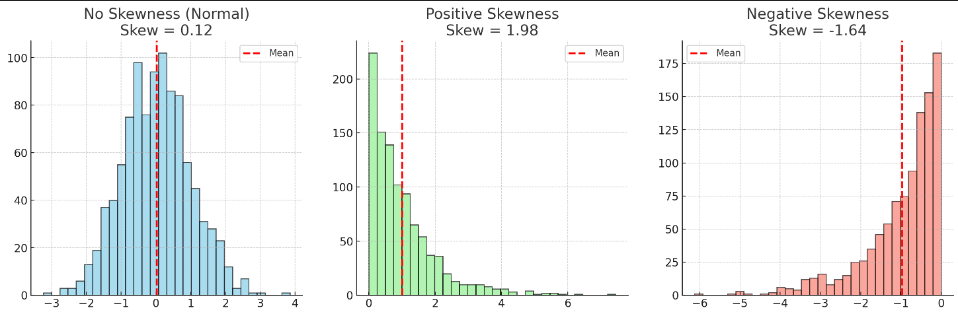

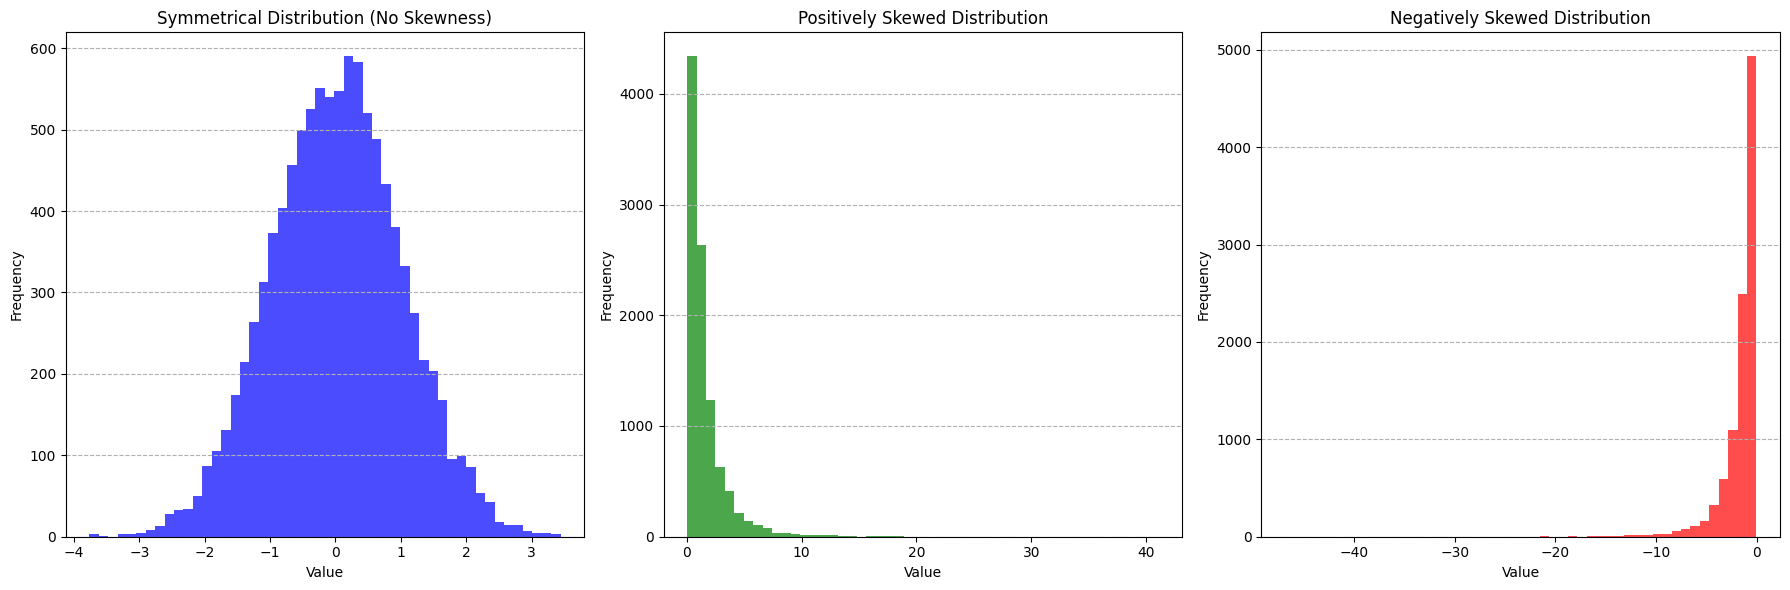

In [5]:
# This script visualizes different types of data skewness using histograms.

import matplotlib.pyplot as plt
import numpy as np

# Set up a figure with three subplots for comparison.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# --- 1. Symmetrical Distribution (No Skewness) ---
# Create a dataset with a normal distribution. This is a classic example
# of a symmetrical dataset where the data is evenly distributed around the mean.
data_symmetrical = np.random.normal(loc=0, scale=1, size=10000)

ax1.hist(data_symmetrical, bins=50, color='blue', alpha=0.7)
ax1.set_title('Symmetrical Distribution (No Skewness)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', linestyle='--')

# --- 2. Positively Skewed Distribution ---
# Create a dataset with positive skewness. This means the tail of the
# distribution is longer on the right side. We can create this using
# a log-normal distribution, which is naturally positively skewed.
data_positive_skew = np.random.lognormal(mean=0.0, sigma=1.0, size=10000)

ax2.hist(data_positive_skew, bins=50, color='green', alpha=0.7)
ax2.set_title('Positively Skewed Distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', linestyle='--')

# --- 3. Negatively Skewed Distribution ---
# Create a dataset with negative skewness. This means the tail of the
# distribution is longer on the left side. We can achieve this by inverting
# a positively skewed distribution.
data_negative_skew = -np.random.lognormal(mean=0.0, sigma=1.0, size=10000)

ax3.hist(data_negative_skew, bins=50, color='red', alpha=0.7)
ax3.set_title('Negatively Skewed Distribution')
ax3.set_xlabel('Value')
ax3.set_ylabel('Frequency')
ax3.grid(axis='y', linestyle='--')

# Adjust layout to prevent titles from overlapping
plt.tight_layout()

# Display the charts
plt.show()


# Graphs

1. Line Plot


What it shows: Trend over time (continuous data).

When to use: Stock prices, temperature over days, sales growth.

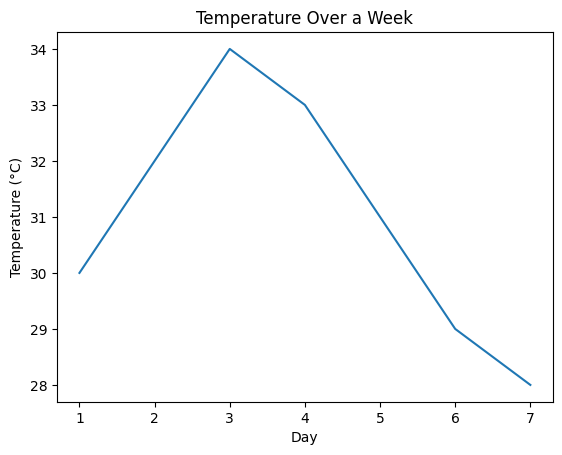

In [7]:
import matplotlib.pyplot as plt

# Example: Daily temperature
days = [1, 2, 3, 4, 5, 6, 7]
temp = [30, 32, 34, 33, 31, 29, 28]

plt.plot(days, temp, )
plt.title("Temperature Over a Week")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.show()


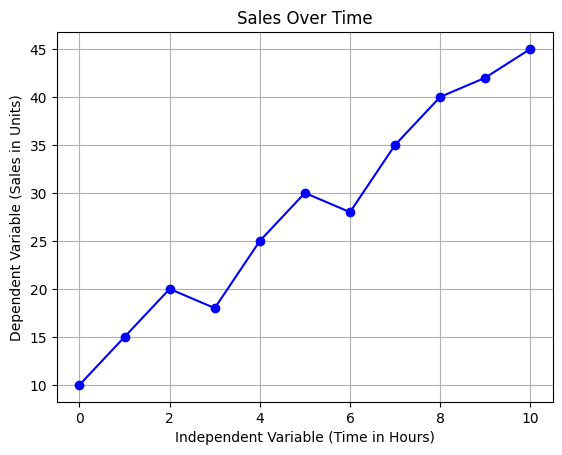

In [1]:
# This script visualizes data using a line chart with matplotlib.

import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the data ---
# We'll use two sets of data to represent the relationship.

# The independent variable (x-axis) - something that changes on its own.
# Here, we'll use a series of time points in hours.
x_independent = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# The dependent variable (y-axis) - something that is affected by the independent variable.
# Here, we'll simulate sales over time.
y_dependent = np.array([10, 15, 20, 18, 25, 30, 28, 35, 40, 42, 45])

# --- 2. Create the line chart ---
# We use the plt.plot() function to create the chart.
plt.plot(x_independent, y_dependent, marker='o', linestyle='-', color='b')

# --- 3. Add labels and a title ---
# Always label your axes to make the chart easy to understand.
# The independent variable is on the x-axis.
plt.xlabel('Independent Variable (Time in Hours)')
# The dependent variable is on the y-axis.
plt.ylabel('Dependent Variable (Sales in Units)')
plt.title('Sales Over Time')

# Add a grid for better readability of the data points.
plt.grid(True)

# Display the chart.
plt.show()


2. Bar Chart

What it shows: Comparison between categories.

When to use: Sales by product, population by country.

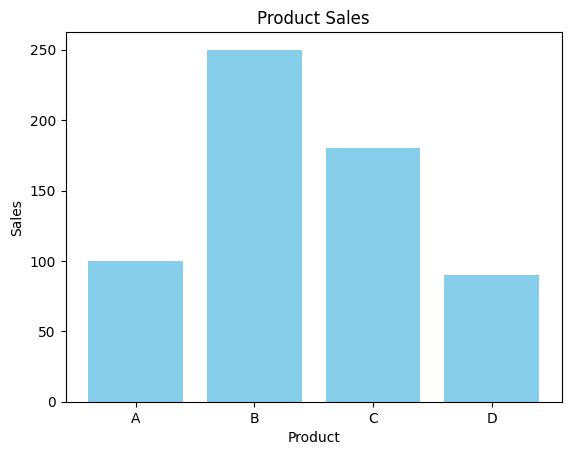

In [ ]:
# Example: Sales of products
products = ["A", "B", "C", "D"]
sales = [100, 250, 180, 90]

plt.bar(products, sales, color='skyblue')
plt.title("Product Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()


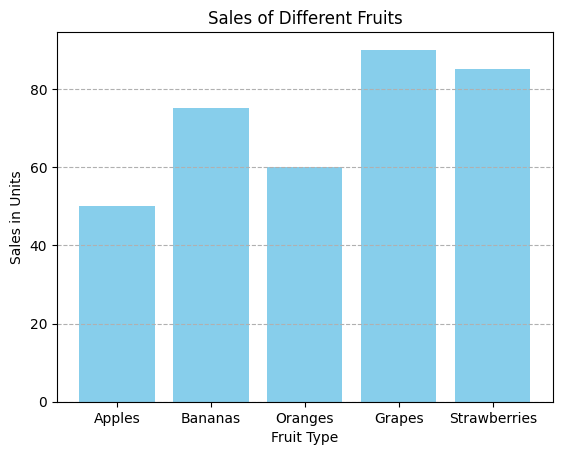

In [2]:
# This script visualizes data using a bar chart with matplotlib.

import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the data ---
# Bar charts are excellent for comparing discrete categories.

# The independent variable (x-axis) - a list of categories.
fruits = ['Apples', 'Bananas', 'Oranges', 'Grapes', 'Strawberries']

# The dependent variable (y-axis) - the value for each category.
sales_units = np.array([50, 75, 60, 90, 85])

# --- 2. Create the bar chart ---
# We use the plt.bar() function to create the chart.
# The x-axis data is the list of categories, and the y-axis data is the corresponding values.
plt.bar(fruits, sales_units, color='skyblue')

# --- 3. Add labels and a title ---
# Always label your axes to make the chart easy to understand.
# The independent variable is on the x-axis.
plt.xlabel('Fruit Type')
# The dependent variable is on the y-axis.
plt.ylabel('Sales in Units')
plt.title('Sales of Different Fruits')

# Add a grid for better readability.
plt.grid(axis='y', linestyle='--')

# Display the chart.
plt.show()


3. Histogram

What it shows: Distribution of data (frequency).

When to use: Age distribution, exam scores, customer incomes.

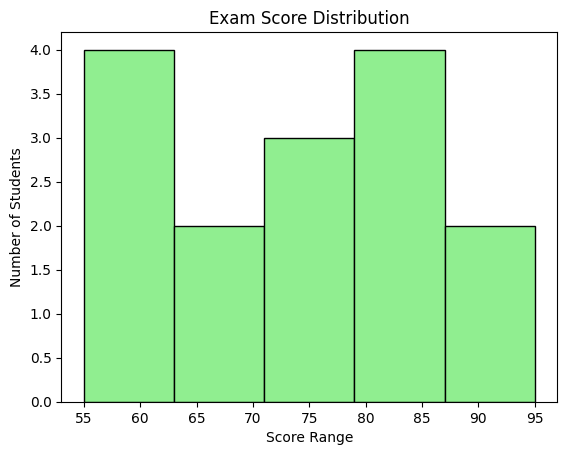

In [ ]:
# Example: Exam scores
scores = [55, 60, 61, 62, 65, 70, 71, 72, 73, 80, 85, 85, 86, 90, 95]

plt.hist(scores, bins=5, color='lightgreen', edgecolor='black')
plt.title("Exam Score Distribution")
plt.xlabel("Score Range")
plt.ylabel("Number of Students")
plt.show()


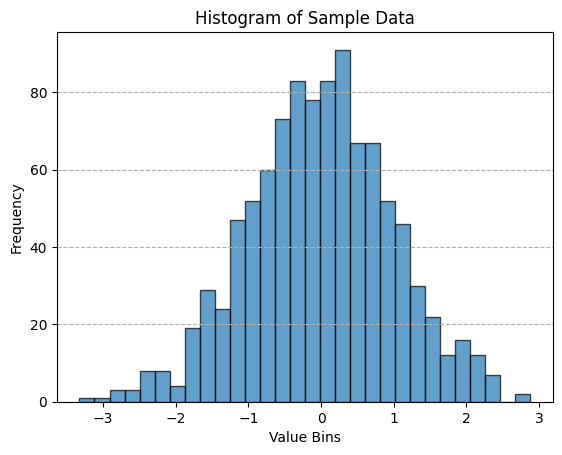

In [3]:
# This script visualizes the distribution of data using a histogram.

import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the data ---
# We'll create a sample dataset of 1000 random values from a normal distribution.
# Histograms work with a single, continuous numerical variable.
data = np.random.randn(1000)

# --- 2. Create the histogram ---
# The plt.hist() function is used to create a histogram.
# The `bins` parameter controls the number of bins (or bars) in the chart.
# More bins give more detail, fewer bins provide a more general view.
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

# --- 3. Add labels and a title ---
# Always label your axes to make the chart easy to understand.
# The x-axis represents the range of values in the data.
plt.xlabel('Value Bins')
# The y-axis represents the frequency or count of data points in each bin.
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Add a grid for better readability.
plt.grid(axis='y', linestyle='--')

# Display the chart.
plt.show()


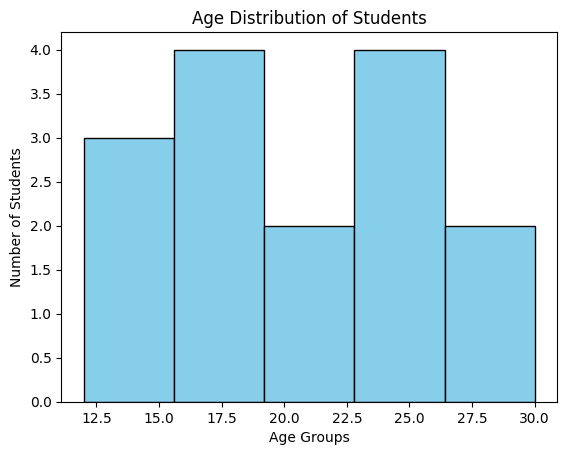

In [ ]:
import matplotlib.pyplot as plt

ages = [12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 25, 26, 28, 30]

plt.hist(ages, bins=5, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Students")
plt.xlabel("Age Groups")
plt.ylabel("Number of Students")
plt.show()


4. Scatter Plot

What it shows: Relationship between two variables.

When to use: Height vs Weight, Hours studied vs Exam score.

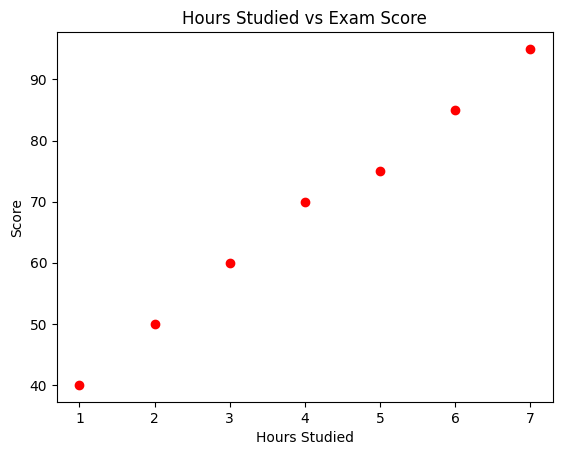

In [ ]:
# Example: Hours studied vs Exam scores
hours = [1, 2, 3, 4, 5, 6, 7]
scores = [40, 50, 60, 70, 75, 85, 95]

plt.scatter(hours, scores, color='red')
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()


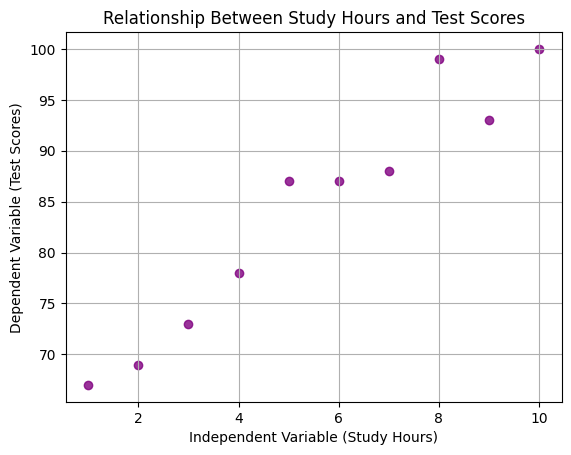

In [4]:
# This script visualizes the relationship between two variables using a scatter plot.

import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the data ---
# We'll create two related datasets to demonstrate the plot.
# The independent variable (x-axis), representing things like study hours.
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# The dependent variable (y-axis), representing things like test scores.
# We'll add a bit of randomness to show a realistic correlation.
test_scores = np.array([65, 70, 75, 80, 85, 90, 92, 95, 98, 100])
test_scores = test_scores + np.random.randint(-5, 5, 10) # Add a small random variation

# --- 2. Create the scatter plot ---
# We use the plt.scatter() function to plot the points.
# The arguments are the x-coordinates and y-coordinates of each point.
plt.scatter(study_hours, test_scores, color='purple', alpha=0.8)

# --- 3. Add labels and a title ---
# Always label your axes to make the chart easy to understand.
plt.xlabel('Independent Variable (Study Hours)')
plt.ylabel('Dependent Variable (Test Scores)')
plt.title('Relationship Between Study Hours and Test Scores')

# Add a grid for better readability.
plt.grid(True)

# Display the chart.
plt.show()


5. Pie Chart

What it shows: Proportions (part of a whole).

When to use: Market share, budget allocation.

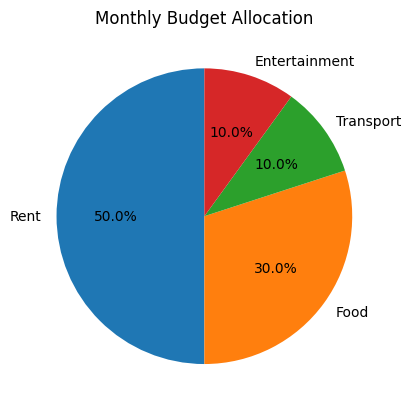

In [ ]:
# Example: Budget allocation
categories = ["Rent", "Food", "Transport", "Entertainment"]
amounts = [500, 300, 100, 100]

plt.pie(amounts, labels=categories, autopct="%1.1f%%", startangle=90)
plt.title("Monthly Budget Allocation")
plt.show()


6. Box Plot (Whisker Plot)

What it shows: Spread, median, and outliers.

When to use: Salary distribution, exam marks.

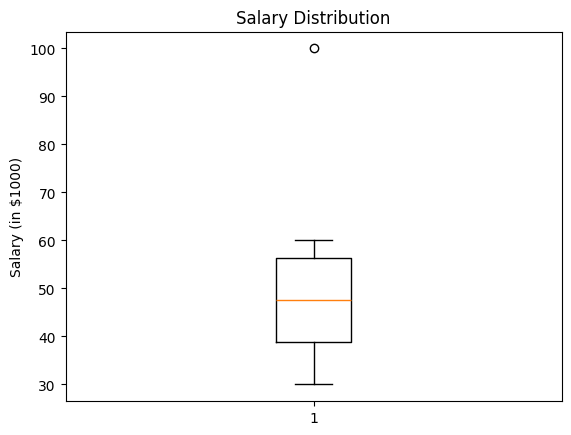

In [ ]:
# Example: Salaries
salaries = [30, 35, 40, 45, 50, 55, 60, 100]  # 100 is an outlier

plt.boxplot(salaries)
plt.title("Salary Distribution")
plt.ylabel("Salary (in $1000)")
plt.show()


In [6]:
import pandas as pd
import numpy as np

# Example DataFrame
data = {
    "col": [1, 2, 3, 10, 50, 100]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Apply log1p transformation (log(1 + x))
df["log_col"] = np.log1p(df["col"])

print("\nDataFrame with log1p applied:")
print(df)


Original DataFrame:
   col
0    1
1    2
2    3
3   10
4   50
5  100

DataFrame with log1p applied:
   col   log_col
0    1  0.693147
1    2  1.098612
2    3  1.386294
3   10  2.397895
4   50  3.931826
5  100  4.615121
